TUKAJ NEKAJ NAPIŠI

In [3]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
import os.path
pot_do_podatkov = os.path.join("../../", "avtomobili", "Avtomobili", "obdelani-podatki", "oglasi.csv")

avti = pd.read_csv(pot_do_podatkov)

Poglejmo si podatke.

In [107]:
avti

,ime_avtomobila,znamka,leto_prve_registracije,prevozeni_kilometri,vrsta_motorja,vrsta_menjalnika,velikost_motorja,moc_motorja,cena,desetletje
0,Abarth - 500-PANORAMA-ODLIÈEN,Abarth,2008,119000 km,bencinski motor,ročni menjalnik,1369 ccm,99 kW / 135 KM\r\n,9650,2000
1,Alfa Romeo 147 1.9 JTD Distinctive,Alfa,2005,232000 km,diesel motor,ročni menjalnik,1910 ccm,85 kW / 116 KM\r\n,1500,2000
2,Alfa Romeo 147 1.9 JTD Distinctive,Alfa,2003,340000 km,diesel motor,ročni menjalnik,1910 ccm,85 kW / 116 KM\r\n,350,2000
3,Alfa Romeo 147 1.9 JTD M-JET-HITRI KREDIT BREZ...,Alfa,2006,243900 km,diesel motor,ročni menjalnik,1910 ccm,88 kW / 120 KM\r\n,1790,2000
4,Alfa Romeo 156 Sportwagon 1.9 JTD Progression,Alfa,2003,338000 km,diesel motor,ročni menjalnik,1910 ccm,85 kW / 116 KM\r\n,1250,2000
...,...,...,...,...,...,...,...,...,...,...
930,Volvo V60 D6 AWD Summum Hybrid Plug-in,Volvo,2013,209745 km,diesel motor,avtomatski menjalnik,2400 ccm,158 kW / 215 KM\r\n,14400,2010
931,Volvo XC60 2.4 5valjni D4 AWD|4x4 Summum®Gear...,Volvo,2016,145282 km,diesel motor,avtomatski menjalnik,2400 ccm,140 kW / 190 KM\r\n,20999,2010
932,Volvo XC60 FWD D4 Momentum,Volvo,2014,205000 km,diesel motor,ročni menjalnik,1969 ccm,133 kW / 181 KM\r\n,15300,2010
933,Volvo XC90 D5 AWD Kinetic Geartronic,Volvo,2017,82457 km,diesel motor,avtomatski menjalnik,1969 ccm,173 kW / 235 KM\r\n,30900,2010


Iz vsakega oglasa za dan avtomobil izločimo sledeče:
- polno ime
- znamko
- leto prve registracije
- stevilo prevozenih kilometrov
- vrsto motorja
- vrsto menjalnika
- velikost motorja
- moč motorja
- ceno

## Avto za študenta

Denimo da ima študent privarčevanih 500€ in ga zanima ali si z njimi lahko privošči nakup avtomobila. Ali lahko na spletni strani avto.net najde kaj primernega? Postavimo dodatne pogoje, starost avtomobila manj kot 15 let in manj kot 150 000 prevoženih kilometrov, da zožimo iskanje na nekoliko bolj ohranjene avte.

In [108]:
avti[(avti.cena < 1000) & (avti.leto_prve_registracije > 2011)]

,ime_avtomobila,znamka,leto_prve_registracije,prevozeni_kilometri,vrsta_motorja,vrsta_menjalnika,velikost_motorja,moc_motorja,cena,desetletje
441,Mercedes-Benz C-Razred,Mercedes-Benz,2021,245000 km,bencinski motor,ročni menjalnik,1995 ccm,93 kW / 126 KM\r\n,990,2020
822,Volkswagen Golf Variant 2.0 TDI BMT Highline D...,Volkswagen,2014,175532 km,diesel motor,avtomatski menjalnik,1968 ccm,110 kW / 150 KM\r\n,800,2010


<AxesSubplot:xlabel='leto_prve_registracije', ylabel='cena'>

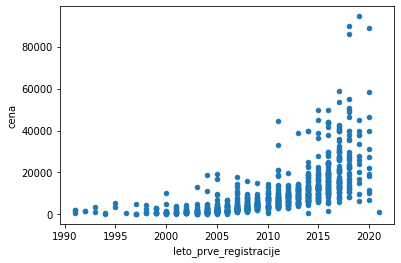

In [109]:
avti[avti.leto_prve_registracije > 1990].plot.scatter("leto_prve_registracije", "cena")

<AxesSubplot:xlabel='znamka'>

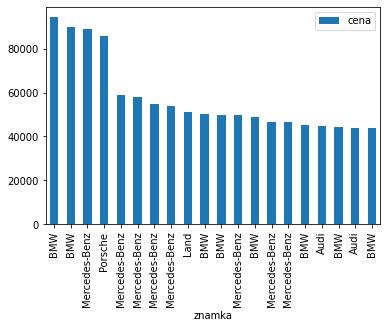

In [110]:
avti.sort_values('cena', ascending=False).head(20).plot.bar(x='znamka', y='cena')

## Primerjava bencin/dizel

Ob nakupu avtomobila se lahko izbere različne vrste motorja. Včasih je bil v uporabi predvsem bencinski motor, v zadnjih desetletjih pa se mu je na vrhu lestvice popularnosti pridružil dizelski motor. Na trgu so tudi druge različice, kot na primer avtomobili na električni pogon in pa hibridna vozila, a so le te vsaj zankrat v manjšini.

<AxesSubplot:xlabel='vrsta_motorja'>

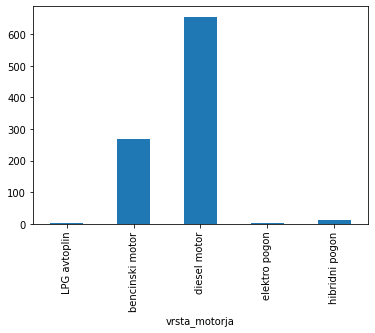

In [131]:
avtomobili_motor = avti.groupby("vrsta_motorja")
avtomobili_motor.size().plot.bar(x="vrsta_motorja", y=avti_motor.size())

V skladu z zgoraj napisanim so tudi rabljeni avtomobili na avto.net v večini primerov opremljeni bodisi z bencinskim bodisi z dizlovim motorjem, ki ga ima največ avtomobilov. Posledično je smiselno ti dve vrsti motorja primerjati in se vprašati, kateri motor je za kupca boljša izbira.
Dizelski motor je v primerjavi z bencinskim smatran za primernejšega za daljše razdalje, veliko prevoženih kilometrov in običajno velja za nekoliko dražjega. Dolgi kilometri na cesti naj bi se bolj izplačali z dizlovim motorjem, saj je za dizel ponavadi potrebno odšteti precej manj kot za bencin. Potrebno pa je omeniti, da je v času posledic ki jih je Covid-19 pustil na svetovnom gospodarstvu, ta razlika v ceni zanemarljiva oziroma je bencin še cenejši (1,074€ / 1,124€ - iz dne 2.2.2021, vir: [AMZS](https://www.amzs.si/na-poti/cene-goriv-po-evropi).
Primerjajmo torej rabljene avtomobile z dizlovim in bencinskim motorjem, ki jih je moč kupiti na [avto.net][https://www.avto.net/Ads/results.asp?znamka=&model=&modelID=&tip=&znamka2=&model2=&tip2=&znamka3=&model3=&tip3=&cenaMin=0&cenaMax=999999&letnikMin=0&letnikMax=2090&bencin=0&starost2=999&oblika=&ccmMin=0&ccmMax=99999&mocMin=&mocMax=&kmMin=0&kmMax=9999999&kwMin=0&kwMax=999&motortakt=&motorvalji=&lokacija=0&sirina=&dolzina=&dolzinaMIN=&dolzinaMAX=&nosilnostMIN=&nosilnostMAX=&lezisc=&presek=&premer=&col=&vijakov=&EToznaka=&vozilo=&airbag=&barva=&barvaint=&EQ1=1000000000&EQ2=1000000000&EQ3=1000000000&EQ4=100000000&EQ5=1000000000&EQ6=1000000000&EQ7=1000100020&EQ8=1010000001&EQ9=100000000&KAT=1010000000&PIA=&PIAzero=&PSLO=&akcija=&paketgarancije=0&broker=&prikazkategorije=&kategorija=&ONLvid=&ONLnak=&zaloga=10&arhiv=&presort=&tipsort=&stran=]

In [ ]:
Zanimata nas le omenjeni dve vrsti motorja. Za začetek si oglejmo povprečno ceno avta glede ne motor.

<AxesSubplot:xlabel='vrsta_motorja'>

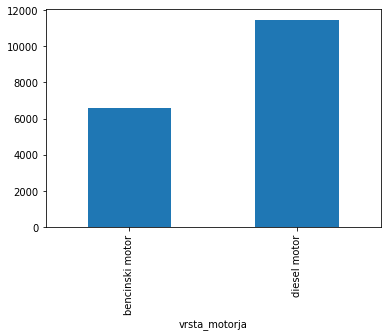

In [148]:
izbrana_motorja = avti[(avti.vrsta_motorja == "bencinski motor") | (avti.vrsta_motorja == "diesel motor")].groupby("vrsta_motorja")
izbrana_motorja.cena.mean().round().plot.bar(x = "vrsta_motorja", y = izbrana_motorja.cena)

Predpostavka o ceni torej drži, vsaj v povprečju. Toda razlika v povprečni ceni je ogromna, skoraj dvakratna, zato je smotrno upoštevati še dodatne parametre, ki igrajo vlogo pri gibanju cen in s tem dobiti realnejšo sliko o cenovni razliki med "bencincem" in "dizlom". To so vrsta menjalnika, velikost in moč motorja, število prevoženih kilometrov in pa seveda starost avtomobila, ki jo bomo za potrebe analize enačili s pretečenim časom od prve registracije.